# Walmart Project
Analysis walmart sales dataset for business decision need. This project is in jedha certfication #block3

**Part 2:** : Model training

Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [68]:
# import 
import os 
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
# px 
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"

### Load data

In [70]:
# helper function : load_pickle_array
def load_pickle_array(file_name) :
    file = open(file_name, 'rb')

    # dump information to that file
    narray = pickle.load(file)

    # close the file
    file.close()

    return narray


# X_train, X_test, Y_train, Y_test
X_train = load_pickle_array('../data/temp/X_train_processed.pickle')
X_test = load_pickle_array('../data/temp/X_test_processed.pickle')
Y_train = load_pickle_array('../data/temp/Y_train.pickle')
Y_test = load_pickle_array('../data/temp/Y_test.pickle')
X_df = load_pickle_array('../data/temp/Features.pickle')
Y_df = load_pickle_array('../data/temp/Target.pickle')

display(X_train[0:3, :])
display(Y_train[0:3])


array([[ 0.04260362, -1.26840641, -0.55534542, -1.1763434 ,  0.74406169,
        -1.10466577, -2.03634567,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.4592769 ,  0.58058829, -2.12734441,  1.47042924,  1.06485475,
         0.43473943,  0.19639882,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.5681943 ,  0.98891668,  0.42633859,  0.14704292, -1.18069669,
         1.20444204,  0.19639882,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       

[614253.33, 313358.15, 1266564.94]

### Correlation

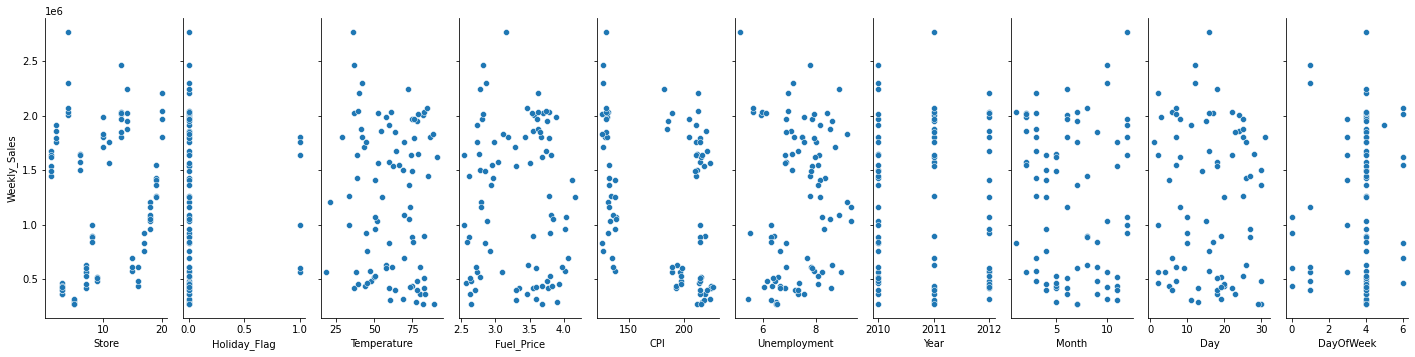

In [71]:
# data
data = pd.concat([X_df, Y_df], axis=1)

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=X_df.columns.to_list(), y_vars='Weekly_Sales', height=5, aspect=0.4);

### Train model

In [72]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [73]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[ 629520.08881436  304800.73299578 1317757.85494102  876285.32175938
 1585744.31449943]



In [74]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[1569787.1944313   691281.31601519 1881546.82452149 1775871.58436869
  358042.40863554]



### Evaluate model

In [75]:
# R-squared scores
r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, Y_test)

print("R2 accuracy on training set : ", r2_train)
print("RMSE accuracy on test set : ", r2_test)

R2 accuracy on training set :  0.9851825826277352
RMSE accuracy on test set :  0.9263462047509963


In [76]:
# RMSE scores
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print("Accuracy on training set : ", rmse_train)
print("Accuracy on test set : ", rmse_test)

Accuracy on training set :  78702.67016669104
Accuracy on test set :  192723.49454276092


### Feature importance

In [63]:
# feature importance
feature_importance = list(zip(X_df.columns.to_list(), model.coef_))
display(feature_importance)

[('Store', -373.0270261717993),
 ('Holiday_Flag', -35080.19641466602),
 ('Temperature', 20981.60862768711),
 ('Fuel_Price', 18895.41631691908),
 ('CPI', 17938.68986877118),
 ('Unemployment', -49288.37846493782),
 ('Year', -15871.320021697968),
 ('Month', 237852.89538487836),
 ('Day', -1170482.7423773822),
 ('DayOfWeek', 579567.0345226241)]